In [1]:
# First XGBoost model for Pima Indians dataset

import pandas                  as     pd
import numpy                   as     np
from   numpy                   import loadtxt
import matplotlib.pyplot       as     plt
import seaborn                 as     sns

from   xgboost                 import XGBClassifier
from   sklearn.model_selection import train_test_split
from   sklearn.metrics         import accuracy_score, roc_curve
from   sklearn.metrics         import classification_report, confusion_matrix

%matplotlib inline

In [2]:
# load data

column_names    = ['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'label']
df              = pd.read_csv('D:/RRD/data/pima-indians-diabetes.data.CSV',\
                              header= None, names = column_names)

print(df.columns)
print(df.shape)

Index(['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age',
       'label'],
      dtype='object')
(768, 9)


In [3]:
df.astype(bool).sum(axis=0)

preg       657
plas       763
pres       733
skin       541
insulin    394
mass       757
pedi       768
age        768
label      268
dtype: int64

In [4]:
df['plas'].replace(0, np.nan, inplace = True)
df['pres'].replace(0, np.nan, inplace = True)
df['skin'].replace(0, np.nan, inplace = True)
df['mass'].replace(0, np.nan, inplace = True)

In [5]:
df.dropna(axis = 0, inplace = True)
df.isnull().any()

preg       False
plas       False
pres       False
skin       False
insulin    False
mass       False
pedi       False
age        False
label      False
dtype: bool

In [6]:
### --------------------
### get the shape
### --------------------
print('\nGet the shape')
print(df.shape)
### --------------------
### Get the data structure
### --------------------
print('\nGet the data structure')
print(df.info())
### -----------------------
### Get the first five rows
### -----------------------
print('\nPrint first five rows')
print(df.head())


Get the shape
(532, 9)

Get the data structure
<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
preg       532 non-null int64
plas       532 non-null float64
pres       532 non-null float64
skin       532 non-null float64
insulin    532 non-null int64
mass       532 non-null float64
pedi       532 non-null float64
age        532 non-null int64
label      532 non-null int64
dtypes: float64(5), int64(4)
memory usage: 41.6 KB
None

Print first five rows
   preg   plas  pres  skin  insulin  mass   pedi  age  label
0     6  148.0  72.0  35.0        0  33.6  0.627   50      1
1     1   85.0  66.0  29.0        0  26.6  0.351   31      0
3     1   89.0  66.0  23.0       94  28.1  0.167   21      0
4     0  137.0  40.0  35.0      168  43.1  2.288   33      1
6     3   78.0  50.0  32.0       88  31.0  0.248   26      1


In [7]:
df['label'].value_counts().apply(lambda x: [x, ( x * 100) / df.shape[0]])

0    [355, 66.72932330827068]
1    [177, 33.27067669172932]
Name: label, dtype: object

In [8]:
feature_names   = df.columns
feature_names  =  feature_names.drop('label')
X              =  df.loc[:,feature_names] 
y              =  df.loc[:,'label']
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(532, 8)
(532,)


In [9]:
# split data into train and test sets
seed      = 12345
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [10]:
print('X train shape')
print(X_train.shape)
print('X test shape')
print(X_test.shape)
print('y train shape')
print(y_train.shape)
print('y test shape')
print(y_test.shape)

X train shape
(372, 8)
X test shape
(160, 8)
y train shape
(372,)
y test shape
(160,)


In [11]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

In [12]:
'''
This function draws a ROC curve and shows the AUROC
'''
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [13]:
# fit model no training data
model = XGBClassifier(seed = 1234)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
       silent=True, subsample=1)

In [14]:
# make predictions for train data
y_train_pred      = model.predict(X_train)
train_predictions = [round(value) for value in y_train_pred]

D:\Python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
train_matrix             = confusion_matrix(y_train, train_predictions)
print("\nTraining Data")
print(train_matrix)


Training Data
[[237   7]
 [ 16 112]]


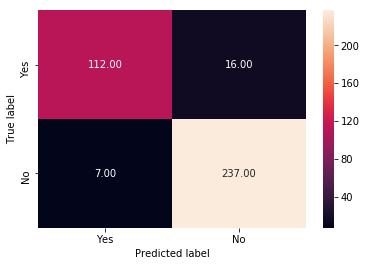

In [16]:
draw_cm(y_train, train_predictions)

In [17]:
accuracy_train     = model.score(X_train, y_train) 
measures_train     = classification_report(y_train, train_predictions) 

print("\nTraining data\n")
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))
print(measures_train) 


Training data

Training Accuracy: 93.817%
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       244
          1       0.94      0.88      0.91       128

avg / total       0.94      0.94      0.94       372



D:\Python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


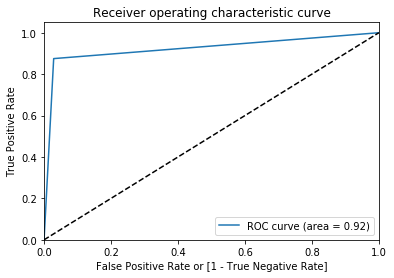

(array([0.        , 0.02868852, 1.        ]),
 array([0.   , 0.875, 1.   ]),
 array([2, 1, 0], dtype=int64))

In [18]:
draw_roc( y_train, train_predictions) 

In [19]:
# make predictions for test data
y_test_pred = model.predict(X_test)
predictions = [round(value) for value in y_test_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.50%


D:\Python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
test_matrix             = confusion_matrix(y_test, y_test_pred)
print("\nTraining Data")
print(test_matrix)


Training Data
[[94 17]
 [19 30]]


In [21]:
accuracy_test      = model.score(X_test, y_test) 
measures_test      = classification_report(y_test, y_test_pred ) 

print("\nTest data\n")
print("Test data Accuracy: %.3f%%" % (accuracy_test  * 100.0))
print(measures_test) 


Test data

Test data Accuracy: 77.500%
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       111
          1       0.64      0.61      0.62        49

avg / total       0.77      0.78      0.77       160



D:\Python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


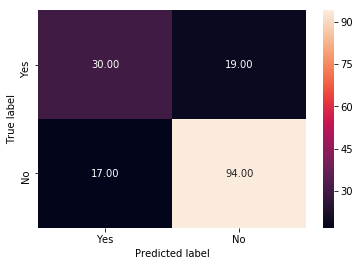

In [22]:
draw_cm(y_test, y_test_pred)

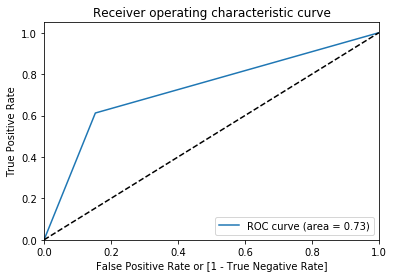

(array([0.        , 0.15315315, 1.        ]),
 array([0.       , 0.6122449, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [23]:
draw_roc(y_test, y_test_pred) 

### Find optimum cut-off
We know the data set is not balanced and hence the standard cut-off of 50% for creating the confusion matrix will not hold good. We need to find the optimum cut-off to divide the data set into two classes.

In [24]:
"""
  This function calculates the Youdens J score which gives the optimum cut-off point 
  given the fpr, tpr and thresholds
"""
def get_youdens_j_cutoff(fpr,tpr,thresholds):
    j_scores = np.abs(tpr - fpr)
    j_ordered = sorted(zip(j_scores,thresholds, fpr, tpr))
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    res = {'fpr': j_ordered[-1][2], 'tpr': j_ordered[-1][3], 'threshold' : j_ordered[-1][1]}
    return res

In [25]:
predicted_proba_tr = model.predict_proba(X_train)[:,1]

{'fpr': 0.06147540983606557, 'threshold': 0.41071832, 'tpr': 0.953125}

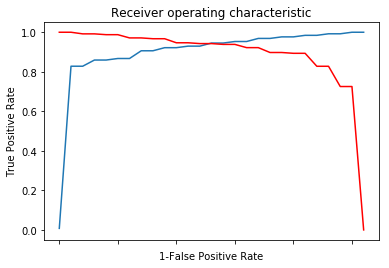

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, predicted_proba_tr, \
                                         drop_intermediate = True )
get_youdens_j_cutoff(fpr, tpr, thresholds)  

In [27]:
threshold__train_df                =  pd.DataFrame()  
threshold__train_df['Actual']      =  y_train
threshold                          =  0.41071832
cutoff_df                          =  pd.DataFrame()
print("\nThreshold is %0.4f" %threshold,"\n")


Threshold is 0.4107 



[[122   6]
 [ 15 229]]


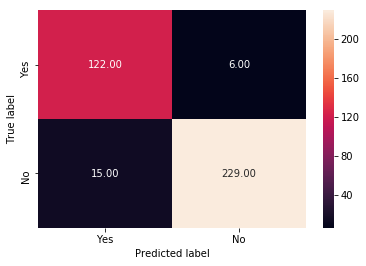

In [28]:
threshold__train_df['Probability'] = predicted_proba_tr
threshold__train_df['pred']        =  threshold__train_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
cm                                 = confusion_matrix(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred'],[1,0])
print(cm)
draw_cm(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred'])

In [29]:
print(classification_report(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred'],[1,0]))


             precision    recall  f1-score   support

          1       0.89      0.95      0.92       128
          0       0.97      0.94      0.96       244

avg / total       0.95      0.94      0.94       372



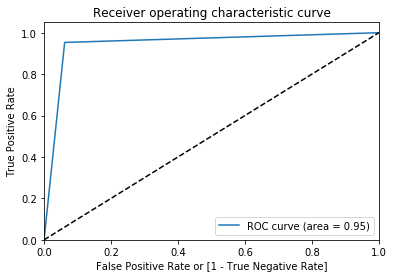

   Threshold    Recall  Precision  Accuracy Ratio
0   0.410718  0.938525   0.974468       94.354839


In [30]:
draw_roc(threshold__train_df['Actual'].astype('int'),\
                                                   threshold__train_df['pred']) 
precision                         = np.diag(cm) / np.sum(cm, axis = 0)
recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / \
                                     (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
recall_positive                   = recall[1]
precision_positive                = precision[1]
cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, \
                                                  'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
print(cutoff_df_ind)

In [31]:
threshold__test_df                =  pd.DataFrame()  
threshold__test_df['Actual']      =  y_test
threshold                         =  0.4107 
cutoff_df                         =  pd.DataFrame()
print("\nThreshold is %0.4f" %threshold,"\n")


Threshold is 0.4107 



In [32]:
predicted_proba_test = model.predict_proba(X_test)[:,1]

[[33 16]
 [22 89]]


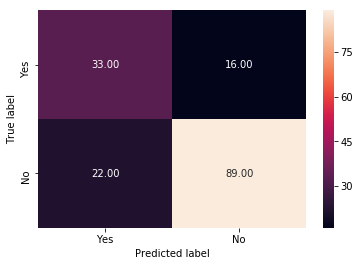

In [33]:
threshold__test_df['Probability'] =  predicted_proba_test
threshold__test_df['pred']        =  threshold__test_df['Probability'].map(lambda x: 1 \
                                                                  if x > threshold else 0)
cm                                = confusion_matrix(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'],[1,0])
print(cm)
draw_cm(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'])

In [34]:
print(classification_report(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred'],[1,0]))

             precision    recall  f1-score   support

          1       0.60      0.67      0.63        49
          0       0.85      0.80      0.82       111

avg / total       0.77      0.76      0.77       160



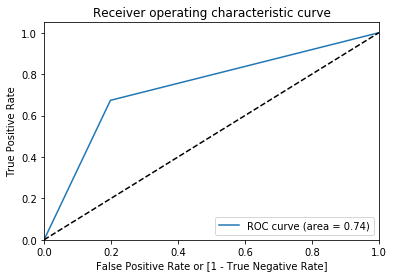

   Threshold    Recall  Precision  Accuracy Ratio
0     0.4107  0.801802   0.847619           76.25


In [35]:
draw_roc(threshold__test_df['Actual'].astype('int'),\
                                                   threshold__test_df['pred']) 
precision                         = np.diag(cm) / np.sum(cm, axis = 0)
recall                            = np.diag(cm) / np.sum(cm, axis = 1) 
accuracy_ratio                    = ((cm[0,0] + cm[1,1]) * 100) / \
                                     (cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
recall_positive                   = recall[1]
precision_positive                = precision[1]
cutoff_df_ind                     = pd.DataFrame({'Threshold': threshold, \
                                                  'Recall' : recall_positive,\
                                               'Precision' : precision_positive,\
                                               'Accuracy Ratio' : accuracy_ratio},\
                                              index = [0])
print(cutoff_df_ind)

In [36]:
feature_imp = pd.Series(model.feature_importances_, index = feature_names).sort_values(ascending = False)
print(feature_imp)

pedi       0.194444
plas       0.168301
mass       0.156863
skin       0.127451
age        0.117647
insulin    0.111111
pres       0.078431
preg       0.045752
dtype: float32


D:\Python\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


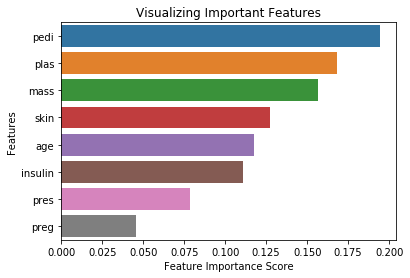

In [37]:
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()